Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import ssl
from sklearn.feature_extraction.text import TfidfVectorizer

Download NLTK Wordnet

In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/senaozb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Read the dataset 

In [3]:
df = pd.read_csv('transcripts/ted_talks_en.csv')
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
df.transcript[0]

'Thank you so much, Chris. And it\'s truly a great honor to have the opportunity to come to this stage twice; I\'m extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that. (Laughter) Put yourselves in my position. (Laughter) I flew on Air Force Two for eight years. (Laughter) Now I have to take off my shoes or boots to get on an airplane! (Laughter) (Applause) I\'ll tell you one quick story to illustrate what that\'s been like for me. (Laughter) It\'s a true story — every bit of this is true. Soon after Tipper and I left the — (Mock sob) White House — (Laughter) we were driving from our home in Nashville to a little farm we have 50 miles east of Nashville. Driving ourselves. (Laughter) I know it sounds like a little thing to you, but — (Laughter) I looked in the rear-view mirror and all of a sudden it just hit me. Ther

In [5]:
df.shape

(4005, 19)

List the contractions for the preprocessing part

In [6]:
contractions = {
    "i'm": "i am",
    "i'm'a": "i am about to",
    "i'm'o": "i am going to",
    "i've": "i have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'd": "i would",
    "i'd've": "i would have",
    "Whatcha": "What are you",
    "amn't": "am not",
    "ain't": "are not",
    "aren't": "are not",
    "'cause": "because",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "didn't": "did not",
    "don't": "do not",
    "don't": "do not",
    "doesn't": "does not",
    "e'er": "ever",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "gimme": "give me",
    "gon't": "go not",
    "gonna": "going to",
    "gotta": "got to",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he've": "he have",
    "he's": "he is",
    "he'll": "he will",
    "he'll've": "he will have",
    "he'd": "he would",
    "he'd've": "he would have",
    "here's": "here is",
    "how're": "how are",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how's": "how is",
    "how'll": "how will",
    "isn't": "is not",
    "it's": "it is",
    "'tis": "it is",
    "'twas": "it was",
    "it'll": "it will",
    "it'll've": "it will have",
    "it'd": "it would",
    "it'd've": "it would have",
    "kinda": "kind of",
    "let's": "let us",
    "luv": "love",
    "ma'am": "madam",
    "may've": "may have",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "ne'er": "never",
    "o'": "of",
    "o'clock": "of the clock",
    "ol'": "old",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "o'er": "over",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shalln't": "shall not",
    "shan't've": "shall not have",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "she'd've": "she would have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "somebody's": "somebody is",
    "someone's": "someone is",
    "something's": "something is",
    "sux": "sucks",
    "that're": "that are",
    "that's": "that is",
    "that'll": "that will",
    "that'd": "that would",
    "that'd've": "that would have",
    "'em": "them",
    "there're": "there are",
    "there's": "there is",
    "there'll": "there will",
    "there'd": "there would",
    "there'd've": "there would have",
    "these're": "these are",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they'd": "they would",
    "they'd've": "they would have",
    "this's": "this is",
    "this'll": "this will",
    "this'd": "this would",
    "those're": "those are",
    "to've": "to have",
    "wanna": "want to",
    "wasn't": "was not",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we'd": "we would",
    "we'd've": "we would have",
    "weren't": "were not",
    "what're": "what are",
    "what'd": "what did",
    "what've": "what have",
    "what's": "what is",
    "what'll": "what will",
    "what'll've": "what will have",
    "when've": "when have",
    "when's": "when is",
    "where're": "where are",
    "where'd": "where did",
    "where've": "where have",
    "where's": "where is",
    "which's": "which is",
    "who're": "who are",
    "who've": "who have",
    "who's": "who is",
    "who'll": "who will",
    "who'll've": "who will have",
    "who'd": "who would",
    "who'd've": "who would have",
    "why're": "why are",
    "why'd": "why did",
    "why've": "why have",
    "why's": "why is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "you're": "you are",
    "you've": "you have",
    "you'll've": "you shall have",
    "you'll": "you will",
    "you'd": "you would",
    "you'd've": "you would have"
}

Define the preprocessing function

In [7]:
def preprocessing_data(texts):
    
    new_text = []
    
    for text in texts:
        text = text.lower() # make the text lower
        
        for contraction in contractions: # change the contractions
            if contraction in text:
                text = re.sub(contraction, contractions[contraction], text)
                
        text = re.sub(r'\([^)]*\)', '', text) # remove texts with paranthesis
        text = re.sub(r'[^\w\s]', '', text) # remove all the punctuations
        text = re.sub(r'\d', '', text) # remove all the numbers

        words = text.split() # tokenize the text

        # remove the stop words
        nltk.download('stopwords')
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]
        
        # apply lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        cleaned_text = " ".join(lemmatized_words)
        new_text.append(cleaned_text)
    
    return new_text

Preprocess texts and add them to the data frame

In [8]:
preprocessed_text = preprocessing_data(df.transcript)
df["preprocessed_text"] = preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/senaozb/nltk_data...
[nltk_data]   Package stopwords is already up-t

Choose 10 texts to visualise easily

In [9]:
selected = df.sample(10) 

TF-IDF Calculation

In [10]:
# Create a vectorizer for the text data 
# min_df = minimum frequency for the words in the dataset
# max_df = maximum frequency for the words in the dataset

vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
tf_idf_data = vectorizer.fit_transform(selected["preprocessed_text"])

tf_idf_data.shape

(10, 653)

The similarity matrix based on cosine similarity is built

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Convert sparse matrix to CSR format 
sparse_matrix_csr = csr_matrix(tf_idf_data)

# Calculate cosine similarity
cosine_similarity_matrix = cosine_similarity(sparse_matrix_csr, sparse_matrix_csr)

# 'cosine_sim_matrix' now contains the cosine similarity values
print("Cosine Similarity Matrix:")
print(cosine_similarity_matrix)

Cosine Similarity Matrix:
[[1.         0.21294016 0.13653203 0.16565257 0.09971713 0.34984444
  0.13224462 0.27258642 0.28264917 0.08913805]
 [0.21294016 1.         0.13612302 0.08902788 0.09115384 0.27129306
  0.14821535 0.26686666 0.22263692 0.15794598]
 [0.13653203 0.13612302 1.         0.17928052 0.09183694 0.15660174
  0.18358466 0.20397765 0.21608316 0.11482902]
 [0.16565257 0.08902788 0.17928052 1.         0.14204389 0.19325957
  0.39018854 0.1785501  0.15116908 0.10093495]
 [0.09971713 0.09115384 0.09183694 0.14204389 1.         0.13485965
  0.09045984 0.18111897 0.19148998 0.10088101]
 [0.34984444 0.27129306 0.15660174 0.19325957 0.13485965 1.
  0.16562785 0.26280071 0.24229202 0.12892045]
 [0.13224462 0.14821535 0.18358466 0.39018854 0.09045984 0.16562785
  1.         0.11792303 0.1975678  0.09746651]
 [0.27258642 0.26686666 0.20397765 0.1785501  0.18111897 0.26280071
  0.11792303 1.         0.38649746 0.20900456]
 [0.28264917 0.22263692 0.21608316 0.15116908 0.19148998 0.242

In [12]:
dissimilarity_matrix = 1.0 - cosine_similarity_matrix
np.fill_diagonal(dissimilarity_matrix, 0.0)
print(dissimilarity_matrix)

[[0.         0.78705984 0.86346797 0.83434743 0.90028287 0.65015556
  0.86775538 0.72741358 0.71735083 0.91086195]
 [0.78705984 0.         0.86387698 0.91097212 0.90884616 0.72870694
  0.85178465 0.73313334 0.77736308 0.84205402]
 [0.86346797 0.86387698 0.         0.82071948 0.90816306 0.84339826
  0.81641534 0.79602235 0.78391684 0.88517098]
 [0.83434743 0.91097212 0.82071948 0.         0.85795611 0.80674043
  0.60981146 0.8214499  0.84883092 0.89906505]
 [0.90028287 0.90884616 0.90816306 0.85795611 0.         0.86514035
  0.90954016 0.81888103 0.80851002 0.89911899]
 [0.65015556 0.72870694 0.84339826 0.80674043 0.86514035 0.
  0.83437215 0.73719929 0.75770798 0.87107955]
 [0.86775538 0.85178465 0.81641534 0.60981146 0.90954016 0.83437215
  0.         0.88207697 0.8024322  0.90253349]
 [0.72741358 0.73313334 0.79602235 0.8214499  0.81888103 0.73719929
  0.88207697 0.         0.61350254 0.79099544]
 [0.71735083 0.77736308 0.78391684 0.84883092 0.80851002 0.75770798
  0.8024322  0.61350

Implement hierarchical agglomerative clustering

In [13]:
class agglomerative_clustering:
    def __init__(self, linkage):
        self.linkage = linkage # the linkage type
        self.linkage_matrix = []

    def get_linkage_matrix(self):
        return np.array(self.linkage_matrix)
    
    # Linkage Types 
    # Single Linkage: the maximum similarity between two clusters are considered
    def single_linkage(self, dissimilarity_matrix, cluster1, cluster2):
        distances = dissimilarity_matrix[np.ix_(cluster1, cluster2)].min()
        return distances
    
    # Complete Linkage: the minimum similarity between two clusters are considered
    def complete_linkage(self, dissimilarity_matrix, cluster1, cluster2):
        distances = dissimilarity_matrix[np.ix_(cluster1, cluster2)].max()
        return distances

    # Average Linkage: the average similarity between two clusters are considered
    def average_linkage(self, dissimilarity_matrix, cluster1, cluster2):
        distances = dissimilarity_matrix[np.ix_(cluster1, cluster2)].mean()
        return distances

    
    def fit(self, dissimilarity_matrix):
        # get the number of entries in the dataset
        num_entry = dissimilarity_matrix.shape[0]
        # create clusters for each entry and assign each entry to the corresponding cluster
        clusters = [[i] for i in range(num_entry)]

        # until the desired number of clusters are created
        while len(clusters) > 1:
            # set the minimum distance to infinity
            min_distance = float('inf')
            # clusters to be merged
            cluster_indices = (0, 0)

            for i in range(len(clusters)-1):
                for j in range(i+1, len(clusters)):
                    if self.linkage == 'single':
                        distance = self.single_linkage(dissimilarity_matrix, clusters[i], clusters[j])
                    elif self.linkage == 'complete':
                        distance = self.complete_linkage(dissimilarity_matrix, clusters[i], clusters[j])
                    elif self.linkage == 'average':
                        distance = self.average_linkage(dissimilarity_matrix, clusters[i], clusters[j])
                    else:
                        raise ValueError(f"Unsupported linkage type: {self.linkage}")

                    if distance < min_distance:
                        min_distance = distance
                        cluster_indices = (i, j)
                        
            # Record the merging step in the linkage matrix
            self.linkage_matrix.append([cluster_indices[0], cluster_indices[1], min_distance, len(clusters[cluster_indices[0]]) + len(clusters[cluster_indices[1]])])

            # Merge the two closest clusters
            merged_cluster = clusters[cluster_indices[0]] + clusters[cluster_indices[1]]
            del clusters[cluster_indices[1]]
            clusters[cluster_indices[0]] = merged_cluster
            print("After merging : ", end='')
            print(clusters)




Results

In [14]:
model_cosine = agglomerative_clustering(linkage='single')
model_cosine.fit(dissimilarity_matrix)

print(model_cosine.get_linkage_matrix())

After merging : [[0], [1], [2], [3, 6], [4], [5], [7], [8], [9]]
After merging : [[0], [1], [2], [3, 6], [4], [5], [7, 8], [9]]
After merging : [[0, 5], [1], [2], [3, 6], [4], [7, 8], [9]]
After merging : [[0, 5, 7, 8], [1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1, 2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1, 2, 9], [3, 6], [4]]
After merging : [[0, 5, 7, 8, 1, 2, 9, 3, 6], [4]]
After merging : [[0, 5, 7, 8, 1, 2, 9, 3, 6, 4]]
[[ 3.          6.          0.60981146  2.        ]
 [ 6.          7.          0.61350254  2.        ]
 [ 0.          5.          0.65015556  2.        ]
 [ 0.          5.          0.71735083  4.        ]
 [ 0.          1.          0.72870694  5.        ]
 [ 0.          1.          0.78391684  6.        ]
 [ 0.          3.          0.79099544  7.        ]
 [ 0.          1.          0.8024322   9.        ]
 [ 0.          1.          0.80851002 10.        ]]


In [15]:
model_cosine = agglomerative_clustering(linkage='complete')
model_cosine.fit(dissimilarity_matrix)

print(model_cosine.get_linkage_matrix())

After merging : [[0], [1], [2], [3, 6], [4], [5], [7], [8], [9]]
After merging : [[0], [1], [2], [3, 6], [4], [5], [7, 8], [9]]
After merging : [[0, 5], [1], [2], [3, 6], [4], [7, 8], [9]]
After merging : [[0, 5, 7, 8], [1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2, 3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2, 3, 6], [4, 9]]
After merging : [[0, 5, 7, 8, 1], [2, 3, 6, 4, 9]]
After merging : [[0, 5, 7, 8, 1, 2, 3, 6, 4, 9]]
[[ 3.          6.          0.60981146  2.        ]
 [ 6.          7.          0.61350254  2.        ]
 [ 0.          5.          0.65015556  2.        ]
 [ 0.          5.          0.75770798  4.        ]
 [ 0.          1.          0.78705984  5.        ]
 [ 1.          2.          0.82071948  3.        ]
 [ 2.          3.          0.89911899  2.        ]
 [ 1.          2.          0.90954016  5.        ]
 [ 0.          1.          0.91097212 10.        ]]


In [16]:
model_cosine = agglomerative_clustering(linkage='average')
model_cosine.fit(dissimilarity_matrix)

print(model_cosine.get_linkage_matrix())

After merging : [[0], [1], [2], [3, 6], [4], [5], [7], [8], [9]]
After merging : [[0], [1], [2], [3, 6], [4], [5], [7, 8], [9]]
After merging : [[0, 5], [1], [2], [3, 6], [4], [7, 8], [9]]
After merging : [[0, 5, 7, 8], [1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2], [3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1], [2, 3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1, 2, 3, 6], [4], [9]]
After merging : [[0, 5, 7, 8, 1, 2, 3, 6, 9], [4]]
After merging : [[0, 5, 7, 8, 1, 2, 3, 6, 9, 4]]
[[ 3.          6.          0.60981146  2.        ]
 [ 6.          7.          0.61350254  2.        ]
 [ 0.          5.          0.65015556  2.        ]
 [ 0.          5.          0.73491792  4.        ]
 [ 0.          1.          0.7565658   5.        ]
 [ 1.          2.          0.81856741  3.        ]
 [ 0.          1.          0.84076297  8.        ]
 [ 0.          2.          0.86951125  9.        ]
 [ 0.          1.          0.87515986 10.        ]]


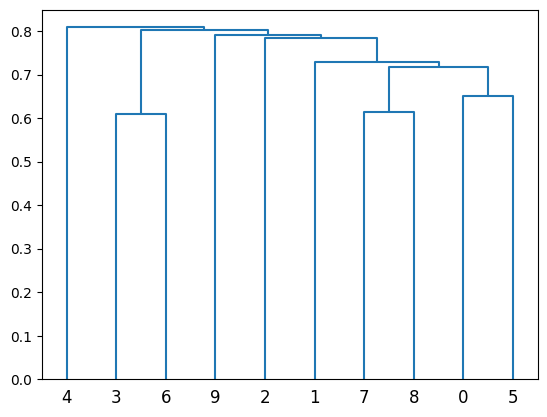

In [17]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib. pyplot as plt 

# Ensure the distance matrix is symmetric
dissimilarity_matrix_r = np.maximum(dissimilarity_matrix, dissimilarity_matrix.T)

# Apply linkage
linkage_matrix_s = linkage(squareform(dissimilarity_matrix_r), method='single')

# Plot dendrogram
dendrogram(linkage_matrix_s)
plt.show()

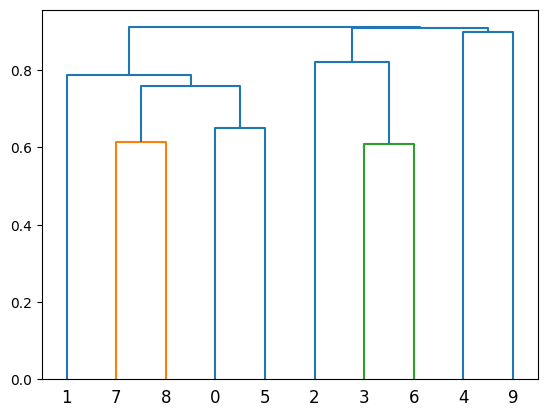

In [18]:
# Apply linkage
linkage_matrix_c = linkage(squareform(dissimilarity_matrix_r), method='complete')

# Plot dendrogram
dendrogram(linkage_matrix_c)
plt.show()

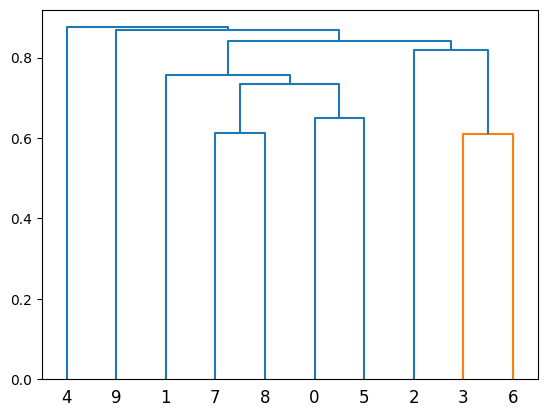

In [19]:
# Apply linkage
linkage_matrix_a = linkage(squareform(dissimilarity_matrix_r), method='average')

# Plot dendrogram
dendrogram(linkage_matrix_a)
plt.show()

In [20]:
for i in range(10):
    print(f"Description of Text {i} : ", end='')
    print(selected.iloc[i, selected.columns.get_loc('description')])
    print()

Description of Text 0 : Have you ever actually read the terms and conditions for the apps you use? Finn Lützow-Holm Myrstad and his team at the Norwegian Consumer Council have, and it took them nearly a day and a half to read the terms of all the apps on an average phone. In a talk about the alarming ways tech companies deceive their users, Myrstad shares insights about the personal information you've agreed to let companies collect -- and how they use your data at a scale you could never imagine.

Description of Text 1 : The LXD (the Legion of Extraordinary Dancers) electrify the TED stage with an emerging global street-dance culture, revved up by the Internet. Directed by Jon M. Chu, this astonishing troupe of dancers and musicians show off their superpowers.

Description of Text 2 : Physicist and surfer Garrett Lisi presents a controversial new model of the universe that -- just maybe -- answers all the big questions. If nothing else, it's the most beautiful 8-dimensional model of e

In [21]:
for i in range(10):
    print(f"Topics of Text {i} : ", end='')
    print(selected.iloc[i, selected.columns.get_loc('topics')])
    print()

Topics of Text 0 : ['Internet', 'business', 'algorithm', 'data', 'consumerism', 'government', 'economics', 'social media', 'society', 'technology']

Topics of Text 1 : ['collaboration', 'dance', 'entertainment', 'gaming', 'performance']

Topics of Text 2 : ['physics', 'science', 'technology']

Topics of Text 3 : ['AI', 'brain', 'algorithm', 'cognitive science', 'machine learning', 'mental health', 'technology', 'neuroscience', 'mindfulness']

Topics of Text 4 : ['TED-Ed', 'math']

Topics of Text 5 : ['robots', 'work']

Topics of Text 6 : ['TED-Ed', 'health', 'health care', 'disease', 'biology', 'human body', 'Vaccines', 'public health', 'virus']

Topics of Text 7 : ['art', 'communication', 'creativity', 'culture', 'design']

Topics of Text 8 : ['Senses', 'beauty', 'happiness', 'materials', 'science', 'smell', 'technology']

Topics of Text 9 : ['TEDx', 'creativity', 'entertainment', 'music', 'performance', 'live music']

